# Numerisk derivasjon

In [1]:
import numpy as np
import matplotlib.pyplot as plt
# Her importeres en quizz modul for jupyter.
# Hvis den ikke allerede er installert blir den installert.
try:
  from jupyterquiz import display_quiz
except:
  !pip install jupyterquiz
  from jupyterquiz import display_quiz
# lenke til quizspørsmål
git_path=""

Gitt en funksjon $f(x)$ og en liste $x = [x_1, x_1, \dots, x_n]$ av $x$-verdier kan vi konstruere listen $y = [f(x_1), f(x_2), \dots, f(x_n)]$ av funksjonsverdier.
Ideen bak numerisk derivasjon er ut i fra listene $x$ og $y$ å lage en liste $z = [z_1, z_2, \dots, z_n]$ som er så lik listen $[f'(x_1), f'(x_2), \dots, f'(x_n)]$ av verdier til den deriverte funksjonen
som vi får til uten å vide mere om funksjonen $f(x)$ enn funksjonsverdiene i listen $y$.

La oss de på et eksempel

In [2]:
n = 20 # antall tall i listene
x = np.linspace(-2*np.pi, 2*np.pi, n) # konstruerer listen x
y = np.sin(x) # funksjonsverdier for f(x) = sin(x)
dx = 4*np.pi / n # steglengden til x-verdiene
z = np.gradient(y, dx) # innebygget funksjon i numpy for numerisk derivasjon 

Siden vi vet at den deriverte funksjonen til $f(x) = \sin(x)$ er $\cos(x)$ håper vi at listen $z$ har de samme tallene i seg som listen $\cos(x)$. La oss se på tallene:

In [3]:
z

array([ 0.97754989,  0.77142422,  0.23997431, -0.39267732, -0.85972947,
       -0.96421739, -0.66207653, -0.08072543,  0.53466911,  0.92458354,
        0.92458354,  0.53466911, -0.08072543, -0.66207653, -0.96421739,
       -0.85972947, -0.39267732,  0.23997431,  0.77142422,  0.97754989])

In [4]:
np.cos(x)

array([ 1.        ,  0.78914051,  0.24548549, -0.40169542, -0.87947375,
       -0.9863613 , -0.67728157, -0.08257935,  0.54694816,  0.94581724,
        0.94581724,  0.54694816, -0.08257935, -0.67728157, -0.9863613 ,
       -0.87947375, -0.40169542,  0.24548549,  0.78914051,  1.        ])

At tallene er nær hverandre er det samme som at differansen er liten.

In [5]:
z - np.cos(x)

array([-0.02245011, -0.01771629, -0.00551118,  0.00901811,  0.01974428,
        0.02214392,  0.01520504,  0.00185392, -0.01227904, -0.0212337 ,
       -0.0212337 , -0.01227904,  0.00185392,  0.01520504,  0.02214392,
        0.01974428,  0.00901811, -0.00551118, -0.01771629, -0.02245011])

Vi kan også plotte $z$ og $\cos(x)$ mot $x$ og se om grafene ser like ut.

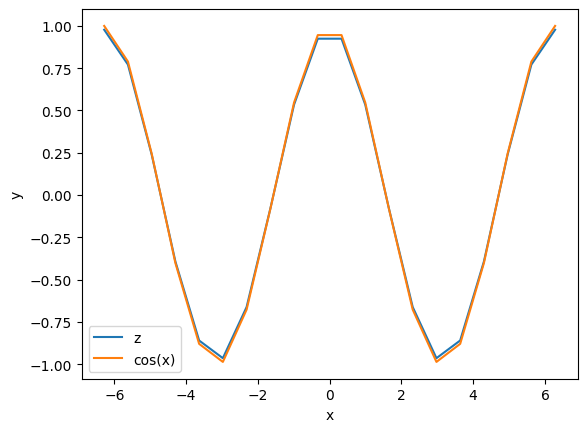

In [6]:
plt.plot(x,z, label='z')
plt.plot(x, np.cos(x), label='cos(x)')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

## Oppgave

Skriv en kodesnutt som beregner tallene i z uten bruk av numpy pakken.

In [7]:
def sentral_diffeanse(y, h):
    """
    Beregner den sentrale differansen til en funksjon.

    Parameters
    ----------
    y : array_like
        En array med funksjonsverdier.
    h : float
        Steglengden.

    Returns
    -------
    dy : array_like
        En array med den sentrale differansen til funksjonen.
    """
    dy = []  # Initialiserer en tom liste for å lagre de sentrale differansene
    for i in range(1, len(y) - 1):  # Itererer gjennom elementene i y, unntatt det første og siste
        # Beregner den sentrale differansen for hvert element
        dy.append((y[i + 1] - y[i - 1]) / (2 * h))  
    return dy  # Returnerer listen med de sentrale differansene

In [8]:
def gradient(y, h):
    """
    Beregner den numeriske gradienten til en funksjon.

    Parameters
    ----------
    y : array_like
        En array med funksjonsverdier.
    h : float
        Steglengden.

    Returns
    -------
    dy : array_like
        En array med den numeriske gradienten til funksjonen.
    """
    # Beregner fremoverdifferansen for det første elementet
    fremover_differanse = (y[1] - y[0]) / h  
    # Beregner bakoverdifferansen for det siste elementet
    bakover_differanse = (y[-1] - y[-2]) / h  
    # Beregner den sentrale differansen for de midterste elementene
    # og kombinerer resultatene i en enkelt liste
    return [fremover_differanse] + sentral_diffeanse(y, h) + [bakover_differanse]

La oss sjekke at vi får samme resultat som numpy:

In [9]:
z - gradient(y, dx)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0.])

![differanser](Finite_difference_method.svg)
([By Kakitc - Own work, CC BY-SA 4.0](https://commons.wikimedia.org/w/index.php?curid=63327976))